In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Employees = pd.read_csv('Employee_dataset.csv', parse_dates= ['Recorddate_key', 'Birthdate_key', 'Orighiredate_key'])
print(Employees.columns)

# quick info on the dataset 
Employees.info()  

Employees.isna().sum()   # no missing values 

# Check for duplicates across all columns
duplicates = df[df.duplicated()]   # no duplicates 


In [ ]:
# simple statistics 
print(np.mean(Employees['Age']))
print(np.median(Employees['Age']))   #median and mean age are the same 

# outliers 
plt.boxplot(Employees['Age'])

print(np.quantile(Employees['Age'], [0, 0.25, 0.5, 0.75, 1]))

twentyfifth = np.quantile(Employees['Age'], 0.25)
seventyfifth = np.quantile(Employees['Age'], 0.75)

IQR = seventyfifth - twentyfifth
print(IQR)

upper_threshold = seventyfifth + (1.5 * IQR)
lower_threshold = twentyfifth - (1.5 * IQR)
print(upper_threshold, lower_threshold)

Employees[(Employees['Age'] < lower_threshold)|(Employees['Age'] > upper_threshold)]   # no outliers 

# age distribution
sns.histplot(data = Employees, x ='Age')   # employee age is evenly distributed 
plt.title('Age Distribution')

Index(['EmployeeID', 'Recorddate_key', 'Birthdate_key', 'Orighiredate_key',
       'Age', 'Length_of_Service', 'City_Name', 'Department_Name', 'Job_Title',
       'Store_Name', 'Gender', 'Termreason_Desc', 'Termtype_Desc',
       'Status_Year', 'Status', 'Business_Unit', 'Job_Category', 'Months',
       'Year'],
      dtype='object')


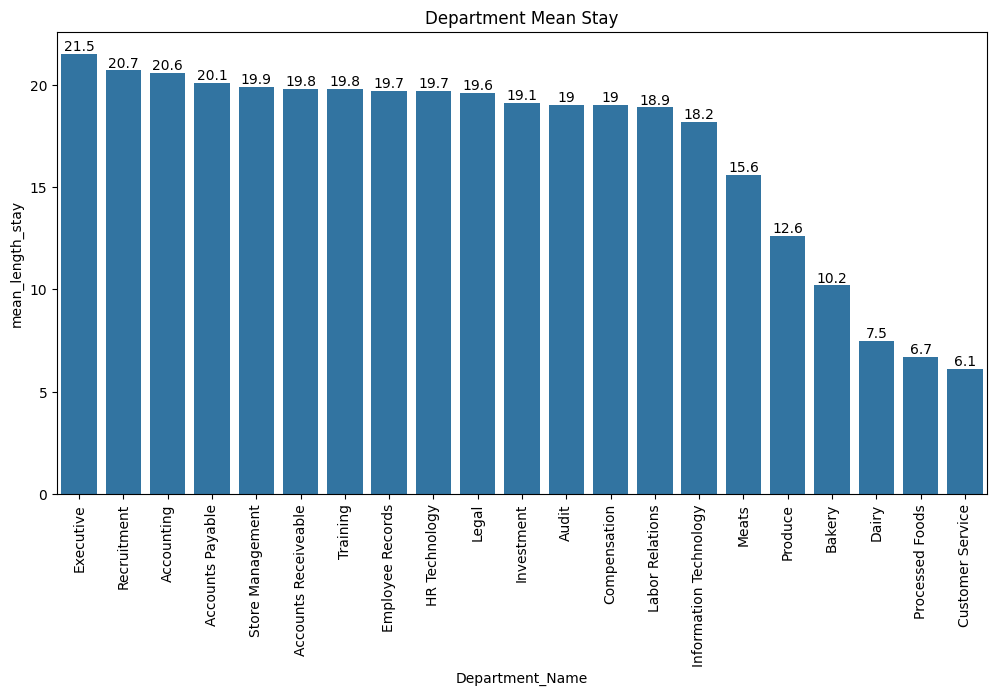

In [292]:
# Aggregating groups 
print(Employees.columns)

Employees['Length_of_Service'].value_counts(sort = True).sort_index()

Employees.groupby('Gender').agg(
        mean_length_service = ('Length_of_Service', 'mean'),
        median_Length_service = ('Length_of_Service', 'median')    # mean length of stay for both genders is the same
) 


    # how long employees in different departments stay in the organization 

Department_stay = Employees.groupby('Department_Name').agg(
                         mean_length_stay = ('Length_of_Service', 'mean')
)

Dept_stay = round(Department_stay.sort_values(by = 'mean_length_stay', ascending= False), 1)  # Executives have a longer stay in the company

plt.figure(figsize= (12, 6))
ax = sns.barplot(data= Dept_stay, x = 'Department_Name', y = 'mean_length_stay')
plt.title('Department Mean Stay')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# countplots 
print(Employees.columns)

# employees who have terminated their work contracts 
sns.countplot(data= Employees, x= 'Termreason_Desc')   # Only a slight number of employees have been laid off
plt.show()

sns.countplot(data= Employees, x = 'Termtype_Desc')   # Only a few of employees termination was Involuntary, with most having non applicable reasons
plt.show()

sns.countplot(data= Employees, x = 'Gender')  # female employees are more than male employees. 
plt.show()
     #how many of each? 
Female_employees = Employees[Employees['Gender'].isin(['Female'])]
f = Female_employees['Gender'].value_counts().sum()

male_employees = Employees[Employees['Gender'].isin(['Male'])]
m = male_employees['Gender'].value_counts().sum()

# city where most employees come from 
Employees['City_Name'].value_counts().head(10)  # most employees reside in Vancouver

Employees['City_Name'].value_counts().tail(10) # Blue River hosts the least employees (9 of them)

# Business unit 
sns.countplot(data= Employees, x = 'Business_Unit')  # most employees work from the company stores with a few working in the company head office
plt.show()

Employees['Business_Unit'].value_counts()

     # mean length of stay for each unit 
BU_stay = Employees.groupby('Business_Unit').agg(
     mean_stay = ('Length_of_Service', 'mean')   # employees working in the head office tend to stay longer
)
print(BU_stay)

# how many employees are still currently working in the comapny and how many have been terminated so far
Employees['Status'].value_counts()  # 48168 are still active in the organization while 1485 have been ternimated 

     # ratio of active to the total employees who have worked in the company 
Active_employees = Employees[Employees['Status'].str.contains('Active')].value_counts().sum()
total_employees = Employees['EmployeeID'].value_counts().sum()

(Active_employees/ total_employees) * 100  # 97% of employees who have worked in the organization are still active there

Index(['City_Name', 'Department_Name', 'Job_Title', 'Gender',
       'Termreason_Desc', 'Termtype_Desc', 'Status', 'Business_Unit',
       'Job_Category'],
      dtype='object')


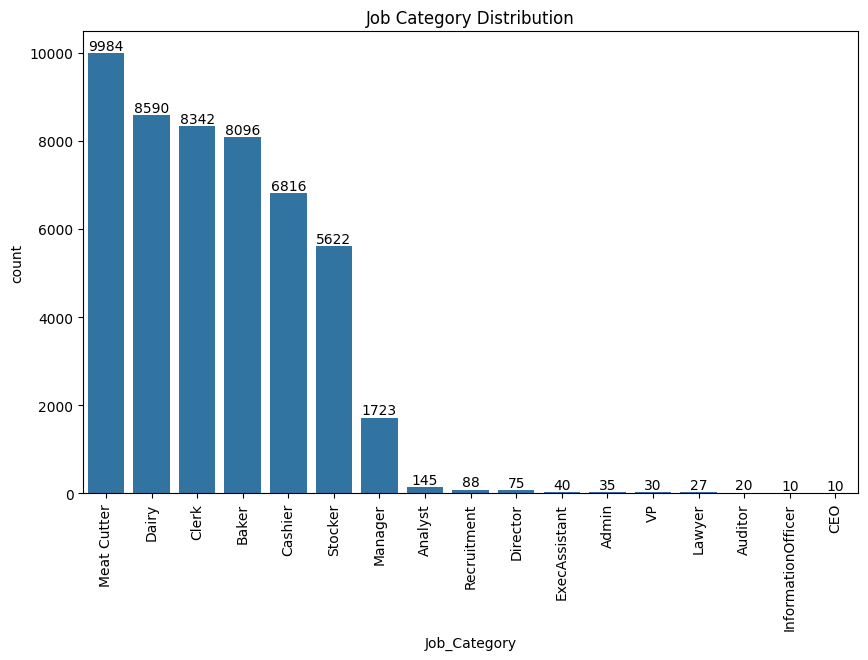

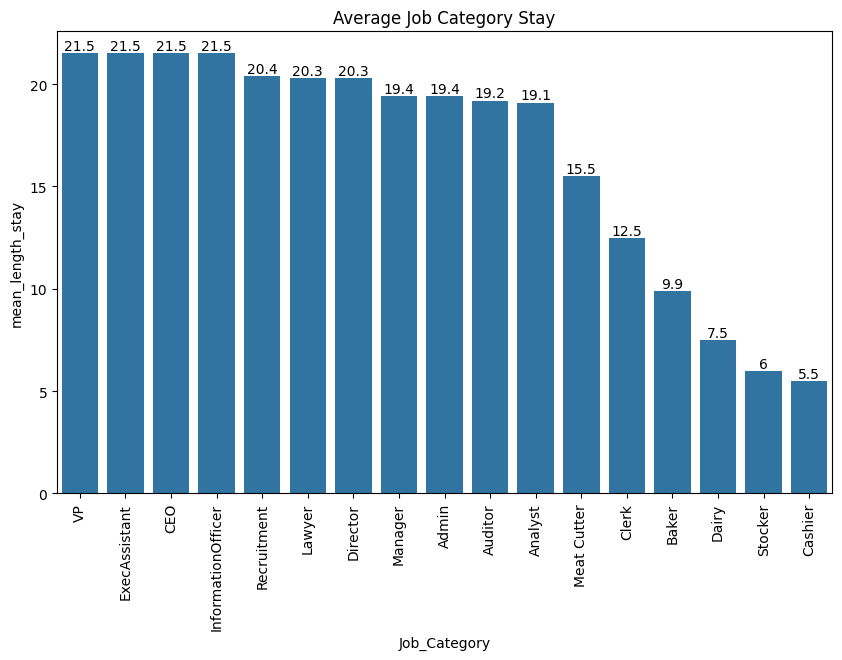

In [204]:
# Categorizing the different job titles 

print(Employees.select_dtypes('object').columns)
Employees['Department_Name'].value_counts() # 18 different departments 
Employees['Job_Title'].value_counts()  # 23 different types of job titles 

# job titles we want 
Job_categories = ['Analyst', 'Director', 'ExecAssistant', 'VP', 
                'Manager', 'Clerk', 'Auditor', 'Lawyer', 'CEO', 
                'Recruitment', 'Admin', 'Cashier', 'Dairy', 'Baker', 'Meat Cutter', 'Stocker', 'InformationOfficer']

# variables with the job filters 
Analyst = 'HRIS Analyst|Labor Relations Analyst|Systems Analyst|Investment Analyst|Compensation Analyst'
Director = 'Director, Accounting|Director, Investments|Director, Labor Relations|Director, Compensation|Director, Audit|Director, Training|Director, Accounts Payable|Director, Accounts Receivable|Director, Employee Records|Director, HR Technology|Director, Recruitment'
ExecAssistant = 'Exec Assistant, VP Stores|Exec Assistant, Finance|Exec Assistant, Human Resources|Exec Assistant, Legal Counsel'
VP = 'VP Stores|VP Human Resources|VP Finance' 
Manager = 'Customer Service Manager|Processed Foods Manager|Bakery Manager|Meats Manager|Produce Manager|Store Manager|Dairy Manager'
Clerk = 'Produce Clerk|Accounting Clerk|Accounts Receiveable Clerk|Accounts Payable Clerk'
Auditor = 'Auditor'
Lawyer = 'Corporate Lawyer|Legal Counsel'
CEO = 'CEO'
Recruitment = 'Trainer|Recruiter'
Admin = 'Benefits Admin'
Cashier = 'Cashier'
Dairy = 'Dairy Person'
Baker = 'Baker'
MeatCutter = 'Meat Cutter'
Stocker = 'Shelf Stocker'
InformationOfficer = 'CHief Information Officer'

# conditions 
condition = [(Employees['Job_Title'].str.contains('Analyst')),
            (Employees['Job_Title'].str.contains(Director)),
            (Employees['Job_Title'].str.contains(ExecAssistant)),
            (Employees['Job_Title'].str.contains(VP)),
            (Employees['Job_Title'].str.contains(Manager)),
            (Employees['Job_Title'].str.contains(Clerk)),
            (Employees['Job_Title'].str.contains(Auditor)),
            (Employees['Job_Title'].str.contains(Lawyer)),
            (Employees['Job_Title'].str.contains(CEO)),
            (Employees['Job_Title'].str.contains(Recruitment)),
            (Employees['Job_Title'].str.contains(Admin)),
            (Employees['Job_Title'].str.contains(Cashier)),
            (Employees['Job_Title'].str.contains(Dairy)),
            (Employees['Job_Title'].str.contains(Baker)),
            (Employees['Job_Title'].str.contains(MeatCutter)),
            (Employees['Job_Title'].str.contains(Stocker)),
            (Employees['Job_Title'].str.contains(InformationOfficer)) 
    ]

#creating the categorical column to visualize the data 
Employees['Job_Category'] = np.select(condition, Job_categories, default= 'Other')
Employees['Job_Category'].value_counts().sort_values(ascending= False)

plt.figure(figsize= (10,6))
ax = sns.countplot(data= Employees, x = 'Job_Category', order= Employees['Job_Category'].value_counts().index)
plt.title('Job Category Distribution')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show() 


# job categories and their mean stay
Job_cat_Stay = Employees.groupby('Job_Category').agg(
    mean_length_stay = ('Length_of_Service', 'mean')
)

category_stay = round(Job_cat_Stay.sort_values(by = 'mean_length_stay', ascending = False), 1) 

plt.figure(figsize= (10,6))
ax = sns.barplot(data=category_stay, x= 'Job_Category', y= 'mean_length_stay')
plt.title('Average Job Category Stay')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])               # VP, CEO,Execassistants and informationofficers have the highest mean stay in te organization
plt.show()

Index(['EmployeeID', 'Recorddate_key', 'Birthdate_key', 'Orighiredate_key',
       'Age', 'Length_of_Service', 'City_Name', 'Department_Name', 'Job_Title',
       'Store_Name', 'Gender', 'Termreason_Desc', 'Termtype_Desc',
       'Status_Year', 'Status', 'Business_Unit', 'Job_Category'],
      dtype='object')


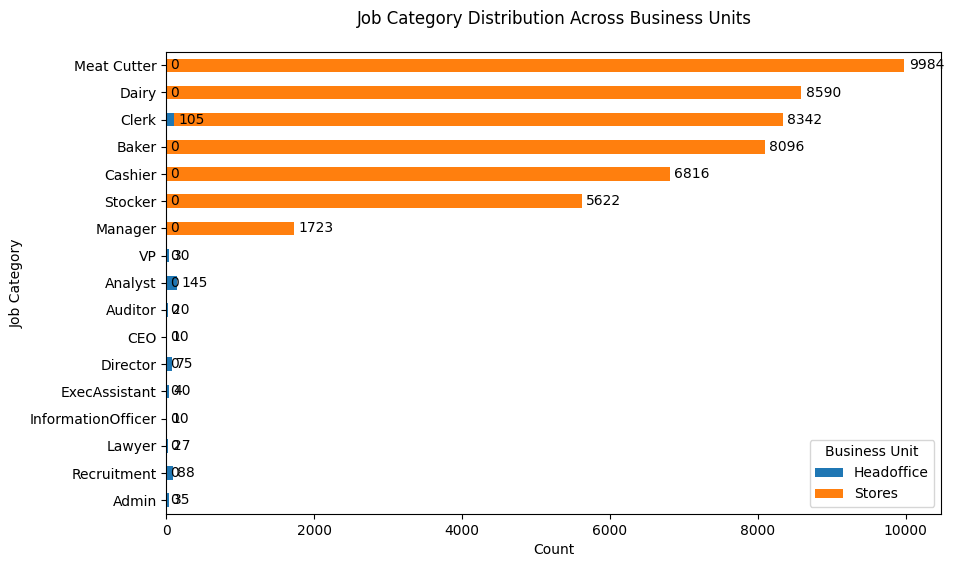

In [187]:
# determining relationships 
print(Employees.columns)

# How many job category are in each Business unit
category_unit_table = Employees.pivot_table(index = 'Job_Category', columns= 'Business_Unit', aggfunc= 'size', fill_value= 0).sort_values(by = 'Stores' , ascending = True)

#category_unit_table_percentage = category_unit_table.div(category_unit_table.sum(axis=1), axis=0) * 100

ax = category_unit_table.plot(kind= 'barh', stacked = True, figsize= (10, 6))
plt.title('Job Category Distribution Across Business Units', pad= 20)
plt.ylabel('Job Category')
plt.xlabel('Count')
plt.legend(title='Business Unit', loc= 'lower right', bbox_to_anchor = (1, 0))  # anchors the legend to bottom right, 1 shifts it horizontally to the right and 0 shifts it vertically to the bottom

# add labels 
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)    


# only clerks are common in all two business units with 105 clerks in the Head office and 8237 in the stores
# Most employees work in the Stores than in the head office. 

Text(0.5, 1.0, 'Average Age by Job Category and Business Unit')

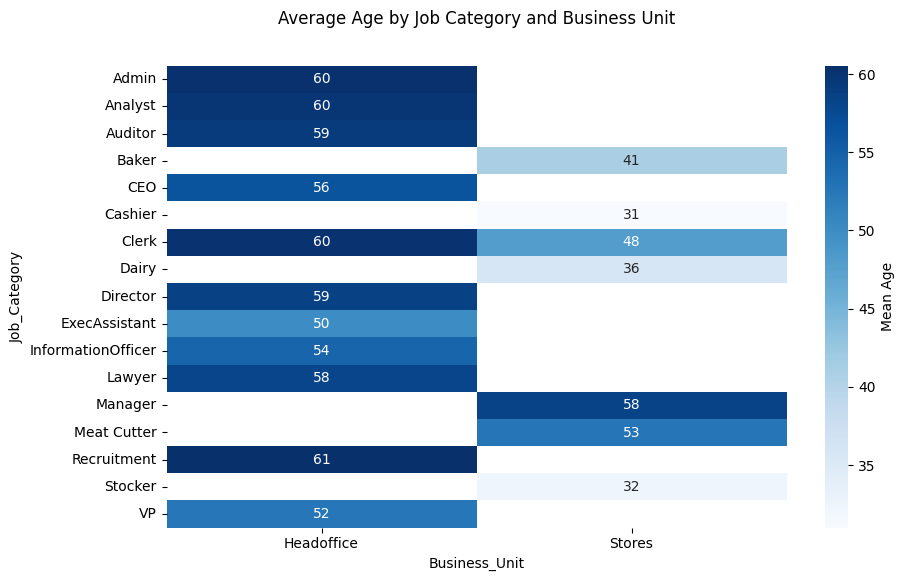

In [188]:
# Age distribtion by job title and business unit using a heat map 

age_heatmap_data = Employees.pivot_table(index = 'Job_Category', columns= 'Business_Unit', values= 'Age', aggfunc= 'mean')

plt.figure(figsize= (10, 6))
ax = sns.heatmap(data= age_heatmap_data, annot = True, cmap = 'Blues', cbar_kws={'label': 'Mean Age'})
plt.title('Average Age by Job Category and Business Unit', pad= 30)

# Explanation 
# The heat map data is categorized in terms of the mean age as stated by the 'aggfunc'. The blank spaces shwo there is no employees in that part. 
# the darker the blue color the more the average age of empoyees in that field and the ligher the color the less the average age of employees in that category. 
# Most employees in the head office have a mean age of 50 years and above while younger employees work in the stores.
# Job categories such as the recruitment sector, clerk, admin, and analysts in the head office have the highest mean ages with the cashier category only in the Stores having the least avg.age at 31
# This represents the seniority required in head office roles which require more experience. The positions may be filled by employees who have spent many years in the industry 
    # and the accumulation of experience over time can result in older average age in these roles. 

int32


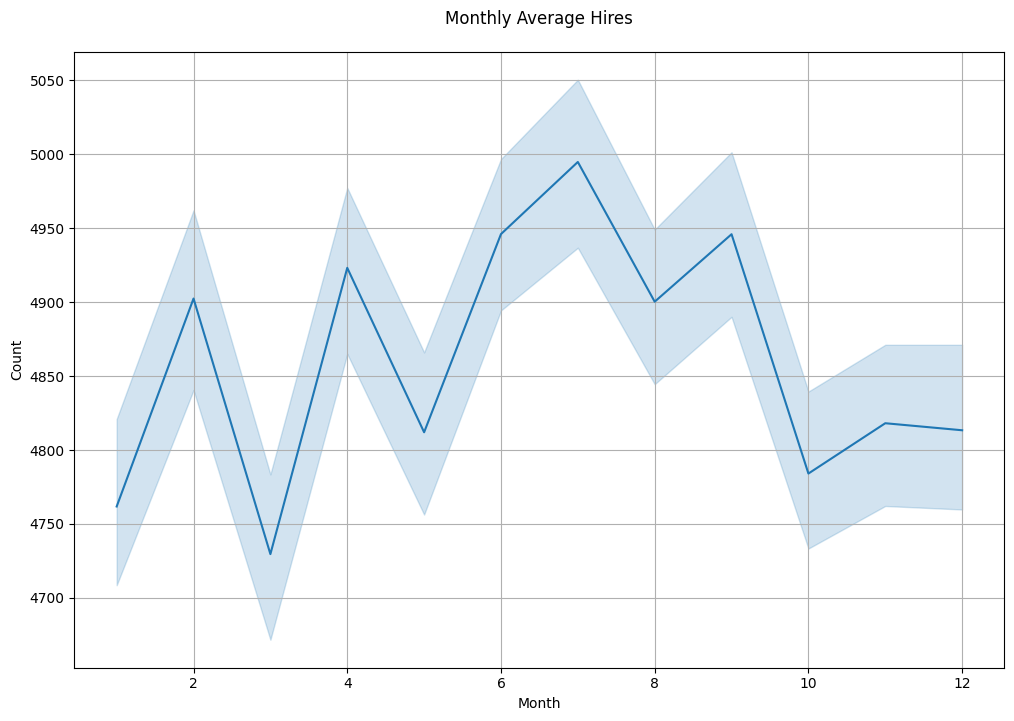

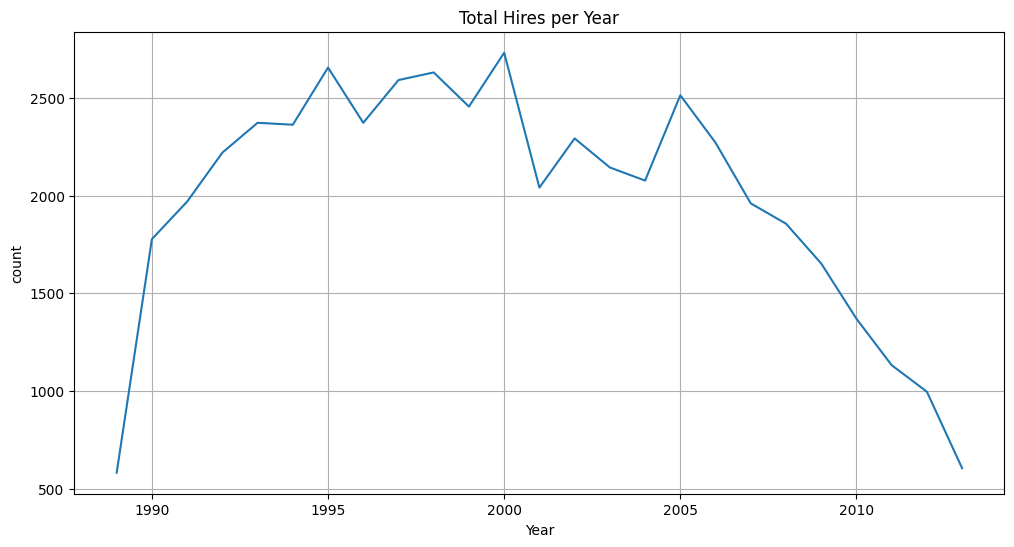

In [293]:
# Trend analysis over time 
Employees.columns
Employees['Orighiredate_key'].dtypes  # clumn is in datetime 

# first and last originhiredate 
oldest_date = Employees['Orighiredate_key'].min()   # from 1989 to 2013 
latest_date = Employees['Orighiredate_key'].max()

# Extracting months  
Employees['Months'] = Employees['Orighiredate_key'].dt.month    
Employees['Months'].nunique() 

# mean Employee hires to compare with the chart result 
mean_hires = round(Employees.groupby('Months').agg({'EmployeeID': 'mean'}), 1).sort_values(by = 'EmployeeID',  ascending = False)

#general Monthly average hires count 
month_hires = Employees['Months'].value_counts().sort_values(ascending = False)

Employees['Months'].dtype  # Months column data type is int 

plt.figure(figsize= (12, 8))
ax = sns.lineplot(data= Employees, x = 'Months', y = 'EmployeeID')

plt.title('Monthly Average Hires', pad= 20)
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)

# Explanation 
# the middle line represents the average hire count for each month, the upper and lower magin for each month represent the maximum and minimum hires that month. 
# Most employee hires generally occur in July showing the need for the organization to rehire new employees after the first year half has ended and after restrategizing on their organization performance with current employees. 
# This could be as a result of hiring to align with the comapny goals set for the end of the year. 

# Yearly hires 
# extracting year from the originhiredate column
Employees['Year'] = Employees['Orighiredate_key'].dt.year

print(Employees['Year'].dtype)   # year column is in data type int 

    # total hires each year
year_hires = Employees['Year'].value_counts().sort_values(ascending= False)

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data= year_hires)
plt.title('Total Hires per Year')
plt.grid(True)

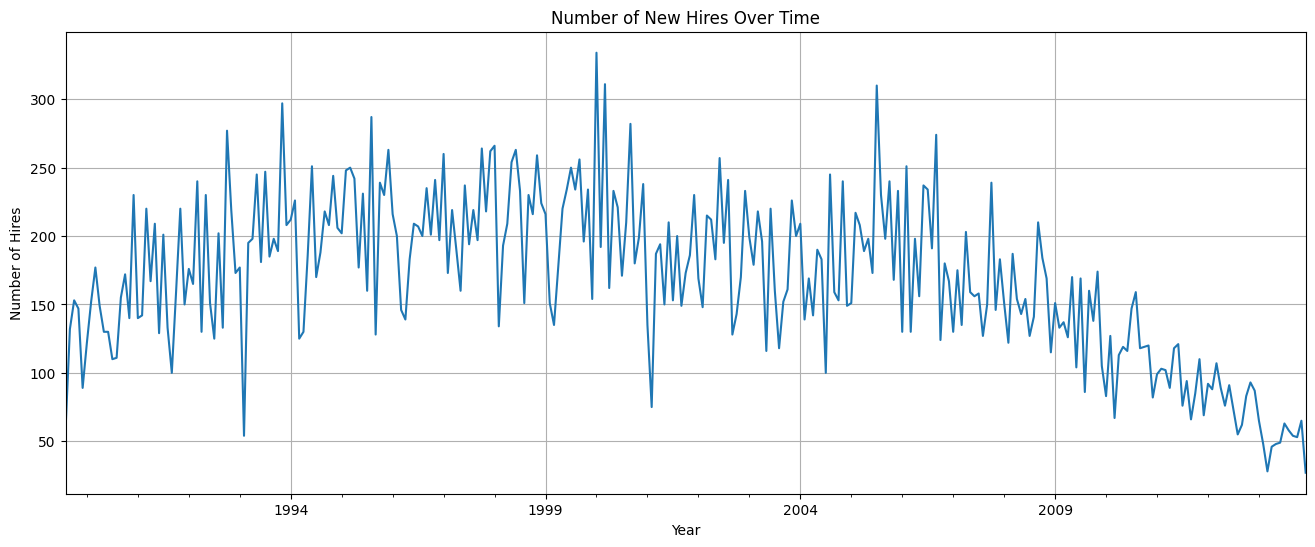

In [288]:
# Hires over time 
monthly_hires = df.resample('ME', on='Orighiredate_key').size()

# Plot the trend
plt.figure(figsize=(16, 6))
monthly_hires.plot()
plt.title('Number of New Hires Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.grid(True)
plt.show()